# Prediction of concrete chloride resistance

## Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

### Load the chloride dataset

In [3]:
dataset = r"C:\Users\Admin\Desktop\Final Year Project\chloride\chloride dataset.xlsx"
raw_data = pd.read_excel(dataset, sheet_name= "Raw Data")
raw_data.head(10)

,w/b,Water (kg/m3),Cement type,Cement (kg/m3),Slag (kg/m3),Fly ash (kg/m3),Silica fume (kg/m3),Lime filler (kg/m3),Fine aggregate (kg/m3),Coarse aggregate (kg/m3),Plasticizer (%),Superplasticizer (%),Comp. str. test age (days),Compressive strength (Mpa),Migration test age (days),Dnssm,Migration resistance
0,0.45,180.00,NaN,400.0,0.0,0.0,0.0,0.0,640.000,960.000,0.0,0.0,126.0,63.22,120.0,2.85,Very high
1,0.45,180.00,NaN,380.0,0.0,0.0,20.0,0.0,640.000,960.000,0.0,0.0,126.0,63.46,120.0,1.75,Extremely high
2,0.45,180.00,NaN,360.0,0.0,0.0,40.0,0.0,640.000,960.000,0.0,0.0,126.0,70.88,120.0,0.9,Extremely high
3,0.45,180.00,NaN,320.0,0.0,0.0,80.0,0.0,640.000,960.000,0.0,0.0,126.0,74.51,120.0,0.2,Extremely high
4,0.55,210.65,NaN,383.0,0.0,0.0,0.0,0.0,612.800,919.200,0.0,0.0,126.0,46.57,120.0,4.76,Very high
5,0.65,238.55,NaN,367.0,0.0,0.0,0.0,0.0,587.200,880.800,0.0,0.0,126.0,40.60,120.0,6.02,High
6,0.35,157.50,CEM I,450.0,0.0,0.0,0.0,0.0,611.418,1154.964,0.0,NaN,28.0,77.00,28.0,10,Moderate
7,0.35,157.50,CEM II/A-D,423.0,0.0,0.0,27.0,0.0,608.801,1147.017,0.0,NaN,28.0,78.00,28.0,5.9,High
8,0.35,157.50,CEM II/A-V,382.5,0.0,67.5,0.0,0.0,606.184,1141.719,0.0,NaN,28.0,63.20,28.0,9.7,High
9,0.35,157.50,CEM II/B-V,315.0,0.0,135.0,0.0,0.0,616.748,1109.931,0.0,NaN,28.0,56.00,28.0,9.7,High


### Data Exporation And Cleaning

In [4]:
# Checking the number of rows and columns

rows, cols = raw_data.shape
print("This data has {} rows and {} columns".format(rows, cols))

This data has 919 rows and 17 columns


In [5]:
# dataset column names

raw_data.columns

Index(['w/b', 'Water (kg/m3)', 'Cement type', 'Cement (kg/m3)', 'Slag (kg/m3)',
       'Fly ash (kg/m3)', 'Silica fume (kg/m3)', 'Lime filler (kg/m3)',
       'Fine aggregate (kg/m3)', 'Coarse aggregate (kg/m3)', 'Plasticizer (%)',
       'Superplasticizer (%)', 'Comp. str. test age (days)',
       'Compressive strength (Mpa)', 'Migration test age (days)', 'Dnssm',
       'Migration resistance'],
      dtype='object')

In [6]:
# dataset information
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   w/b                         899 non-null    float64
 1   Water (kg/m3)               890 non-null    float64
 2   Cement type                 908 non-null    object 
 3   Cement (kg/m3)              919 non-null    float64
 4   Slag (kg/m3)                919 non-null    float64
 5   Fly ash (kg/m3)             919 non-null    float64
 6   Silica fume (kg/m3)         919 non-null    float64
 7   Lime filler (kg/m3)         919 non-null    float64
 8   Fine aggregate (kg/m3)      661 non-null    float64
 9   Coarse aggregate (kg/m3)    664 non-null    float64
 10  Plasticizer (%)             788 non-null    float64
 11  Superplasticizer (%)        602 non-null    float64
 12  Comp. str. test age (days)  638 non-null    float64
 13  Compressive strength (Mpa)  583 non

In [7]:
# drop irrelevant columns

raw_data = raw_data.drop(['Cement type', 'Migration resistance'], axis=1)

In [8]:
# Percentage of null values in each columns

for col in raw_data.columns:
    pct_nan = (raw_data[col].isna().sum() / raw_data[col].count()) * 100
    print(f'{col} has {pct_nan:.2f}% NaN values')

w/b has 2.22% NaN values
Water (kg/m3) has 3.26% NaN values
Cement (kg/m3) has 0.00% NaN values
Slag (kg/m3) has 0.00% NaN values
Fly ash (kg/m3) has 0.00% NaN values
Silica fume (kg/m3) has 0.00% NaN values
Lime filler (kg/m3) has 0.00% NaN values
Fine aggregate (kg/m3) has 39.03% NaN values
Coarse aggregate (kg/m3) has 38.40% NaN values
Plasticizer (%) has 16.62% NaN values
Superplasticizer (%) has 52.66% NaN values
Comp. str. test age (days) has 44.04% NaN values
Compressive strength (Mpa) has 57.63% NaN values
Migration test age (days) has 1.32% NaN values
Dnssm has 3.96% NaN values


In [9]:
# drop values where Dnssm value are null

raw_data.dropna(subset=['Dnssm'], inplace=True)
raw_data.shape

(884, 15)

In [10]:
# Replace null values in relevant columns with zero

raw_data.fillna({
    'Fine aggregate (kg/m3)': 0,
    'Coarse aggregate (kg/m3)': 0,
    'Plasticizer (%)':0,
    'Superplasticizer (%)':0
}, inplace=True)

# Calculate the total and update the 'Water (kg/m3)' column

raw_data['Water (kg/m3)'] = raw_data.apply(
    lambda row: (row['Cement (kg/m3)'] + row['Slag (kg/m3)'] + row['Fly ash (kg/m3)'] +
                 row['Silica fume (kg/m3)'] + row['Lime filler (kg/m3)'] +
                 row['Fine aggregate (kg/m3)'] + row['Coarse aggregate (kg/m3)']) * row['w/b']
    if pd.isnull(row['Water (kg/m3)']) else row['Water (kg/m3)'],
    axis=1
)


In [11]:
#Removing rows with empty values

raw_data.dropna(subset=['w/b', 'Migration test age (days)','Water (kg/m3)', 'Migration test age (days)','Comp. str. test age (days)', 'Compressive strength (Mpa)', 'Dnssm'], inplace=True)
raw_data.shape

(555, 15)

In [12]:
#check the number of duplicates and remove them

print(f"The number of duplicate are:{sum(raw_data.duplicated())}")

raw_data = raw_data.drop_duplicates()

The number of duplicate are:0


In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 0 to 918
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   w/b                         555 non-null    float64
 1   Water (kg/m3)               555 non-null    float64
 2   Cement (kg/m3)              555 non-null    float64
 3   Slag (kg/m3)                555 non-null    float64
 4   Fly ash (kg/m3)             555 non-null    float64
 5   Silica fume (kg/m3)         555 non-null    float64
 6   Lime filler (kg/m3)         555 non-null    float64
 7   Fine aggregate (kg/m3)      555 non-null    float64
 8   Coarse aggregate (kg/m3)    555 non-null    float64
 9   Plasticizer (%)             555 non-null    float64
 10  Superplasticizer (%)        555 non-null    float64
 11  Comp. str. test age (days)  555 non-null    float64
 12  Compressive strength (Mpa)  555 non-null    float64
 13  Migration test age (days)   555 non-null

In [14]:
raw_data.describe()

,w/b,Water (kg/m3),Cement (kg/m3),Slag (kg/m3),Fly ash (kg/m3),Silica fume (kg/m3),Lime filler (kg/m3),Fine aggregate (kg/m3),Coarse aggregate (kg/m3),Plasticizer (%),Superplasticizer (%),Comp. str. test age (days),Compressive strength (Mpa),Migration test age (days)
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,0.406295,176.524750,345.475266,31.566765,31.404728,7.794174,6.960270,580.612000,587.919782,0.032948,0.223811,35.090901,59.403423,70.164775
std,0.093195,151.954454,158.503506,94.905159,89.148149,24.192154,40.735439,380.014751,468.196962,0.167304,0.407546,27.480157,58.622439,90.170027
min,0.190232,0.450000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.450000,0.450000
25%,0.350000,145.000000,271.720600,0.000000,0.000000,0.000000,0.000000,31.728423,0.000000,0.000000,0.000000,28.000000,35.400000,28.000000
50%,0.408964,162.900000,340.000000,0.000000,0.000000,0.000000,0.000000,725.577062,519.050000,0.000000,0.000000,28.000000,46.300000,28.000000
75%,0.450000,180.000000,401.000000,0.000000,0.000000,0.000000,0.000000,810.154000,1037.047182,0.000000,0.420000,28.000000,60.900000,90.000000
max,0.680000,1674.400000,2384.971208,1284.443449,735.000000,468.500000,350.000000,1574.100000,2783.000000,0.894737,2.540000,180.000000,483.000000,425.000000


### Graphs

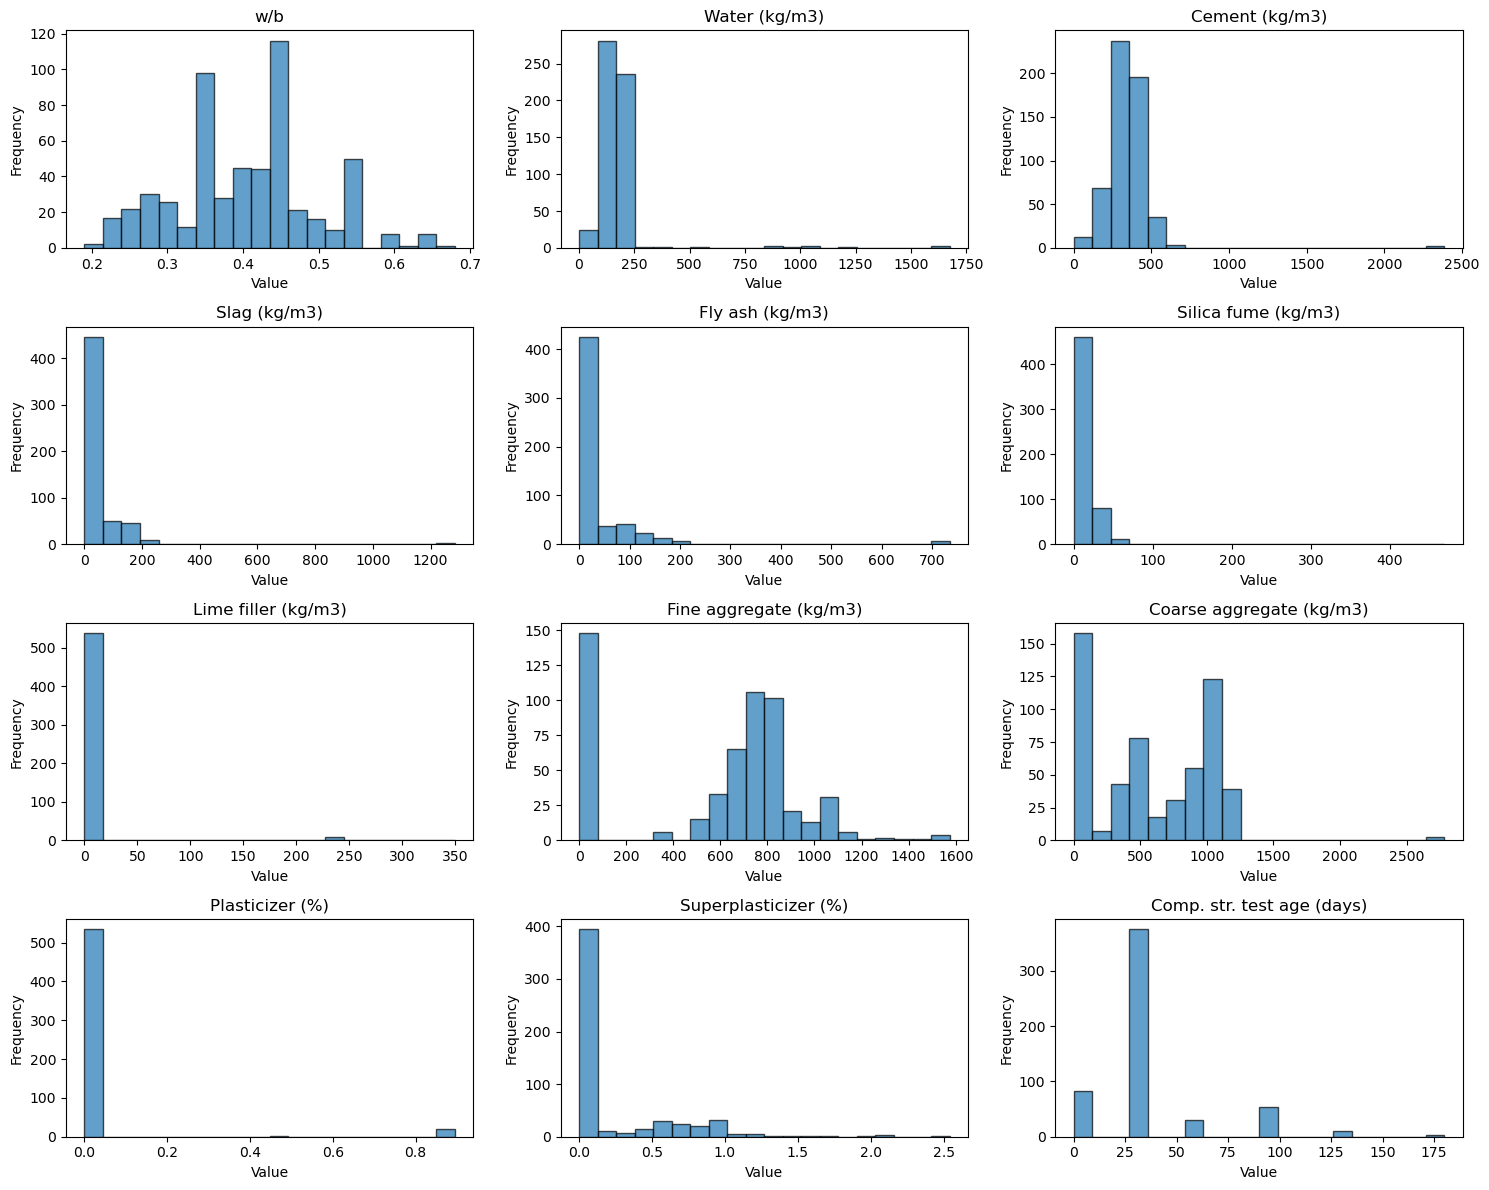

In [15]:
numeric_columns = [
    'w/b', 'Water (kg/m3)', 'Cement (kg/m3)', 'Slag (kg/m3)',
    'Fly ash (kg/m3)', 'Silica fume (kg/m3)', 'Lime filler (kg/m3)',
    'Fine aggregate (kg/m3)', 'Coarse aggregate (kg/m3)', 
    'Plasticizer (%)', 'Superplasticizer (%)', 'Comp. str. test age (days)'
]

# Set up the figure and axes
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axs = axs.flatten()

# Plot histograms
for i, column in enumerate(numeric_columns):
    if column in raw_data.columns:
        axs[i].hist(raw_data[column].dropna(), bins=20, edgecolor='k', alpha=0.7)
        axs[i].set_title(column)
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
    else:
        axs[i].axis('off')  # Turn off unused subplots

# Adjust layout
plt.tight_layout()
plt.show()

Key Observations

- Water: The water distribution is skewed to the right, indicating that a majority of mixes have a higher water content.
- Cement: The cement distribution is relatively symmetrical, suggesting a more balanced use of this cement mix.
- Slag, Fly Ash, and Silica Fume: These are supplementary cementitious materials (SCMs), it is an additive used to enhance the properties of the concrete
- Lime Filler, Fine Aggregate, and Coarse Aggregate:Lime filler has a more consistent use. Fine and coarse aggregates show broader distributions.
- Plasticizer and Superplasticizer: The distributions for these chemical admixtures are skewed to the right, indicating higher usage levels. This is to improve workability or reduce water content.
- Compressive Strength Test Age: The is concentrated around a specific age.

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


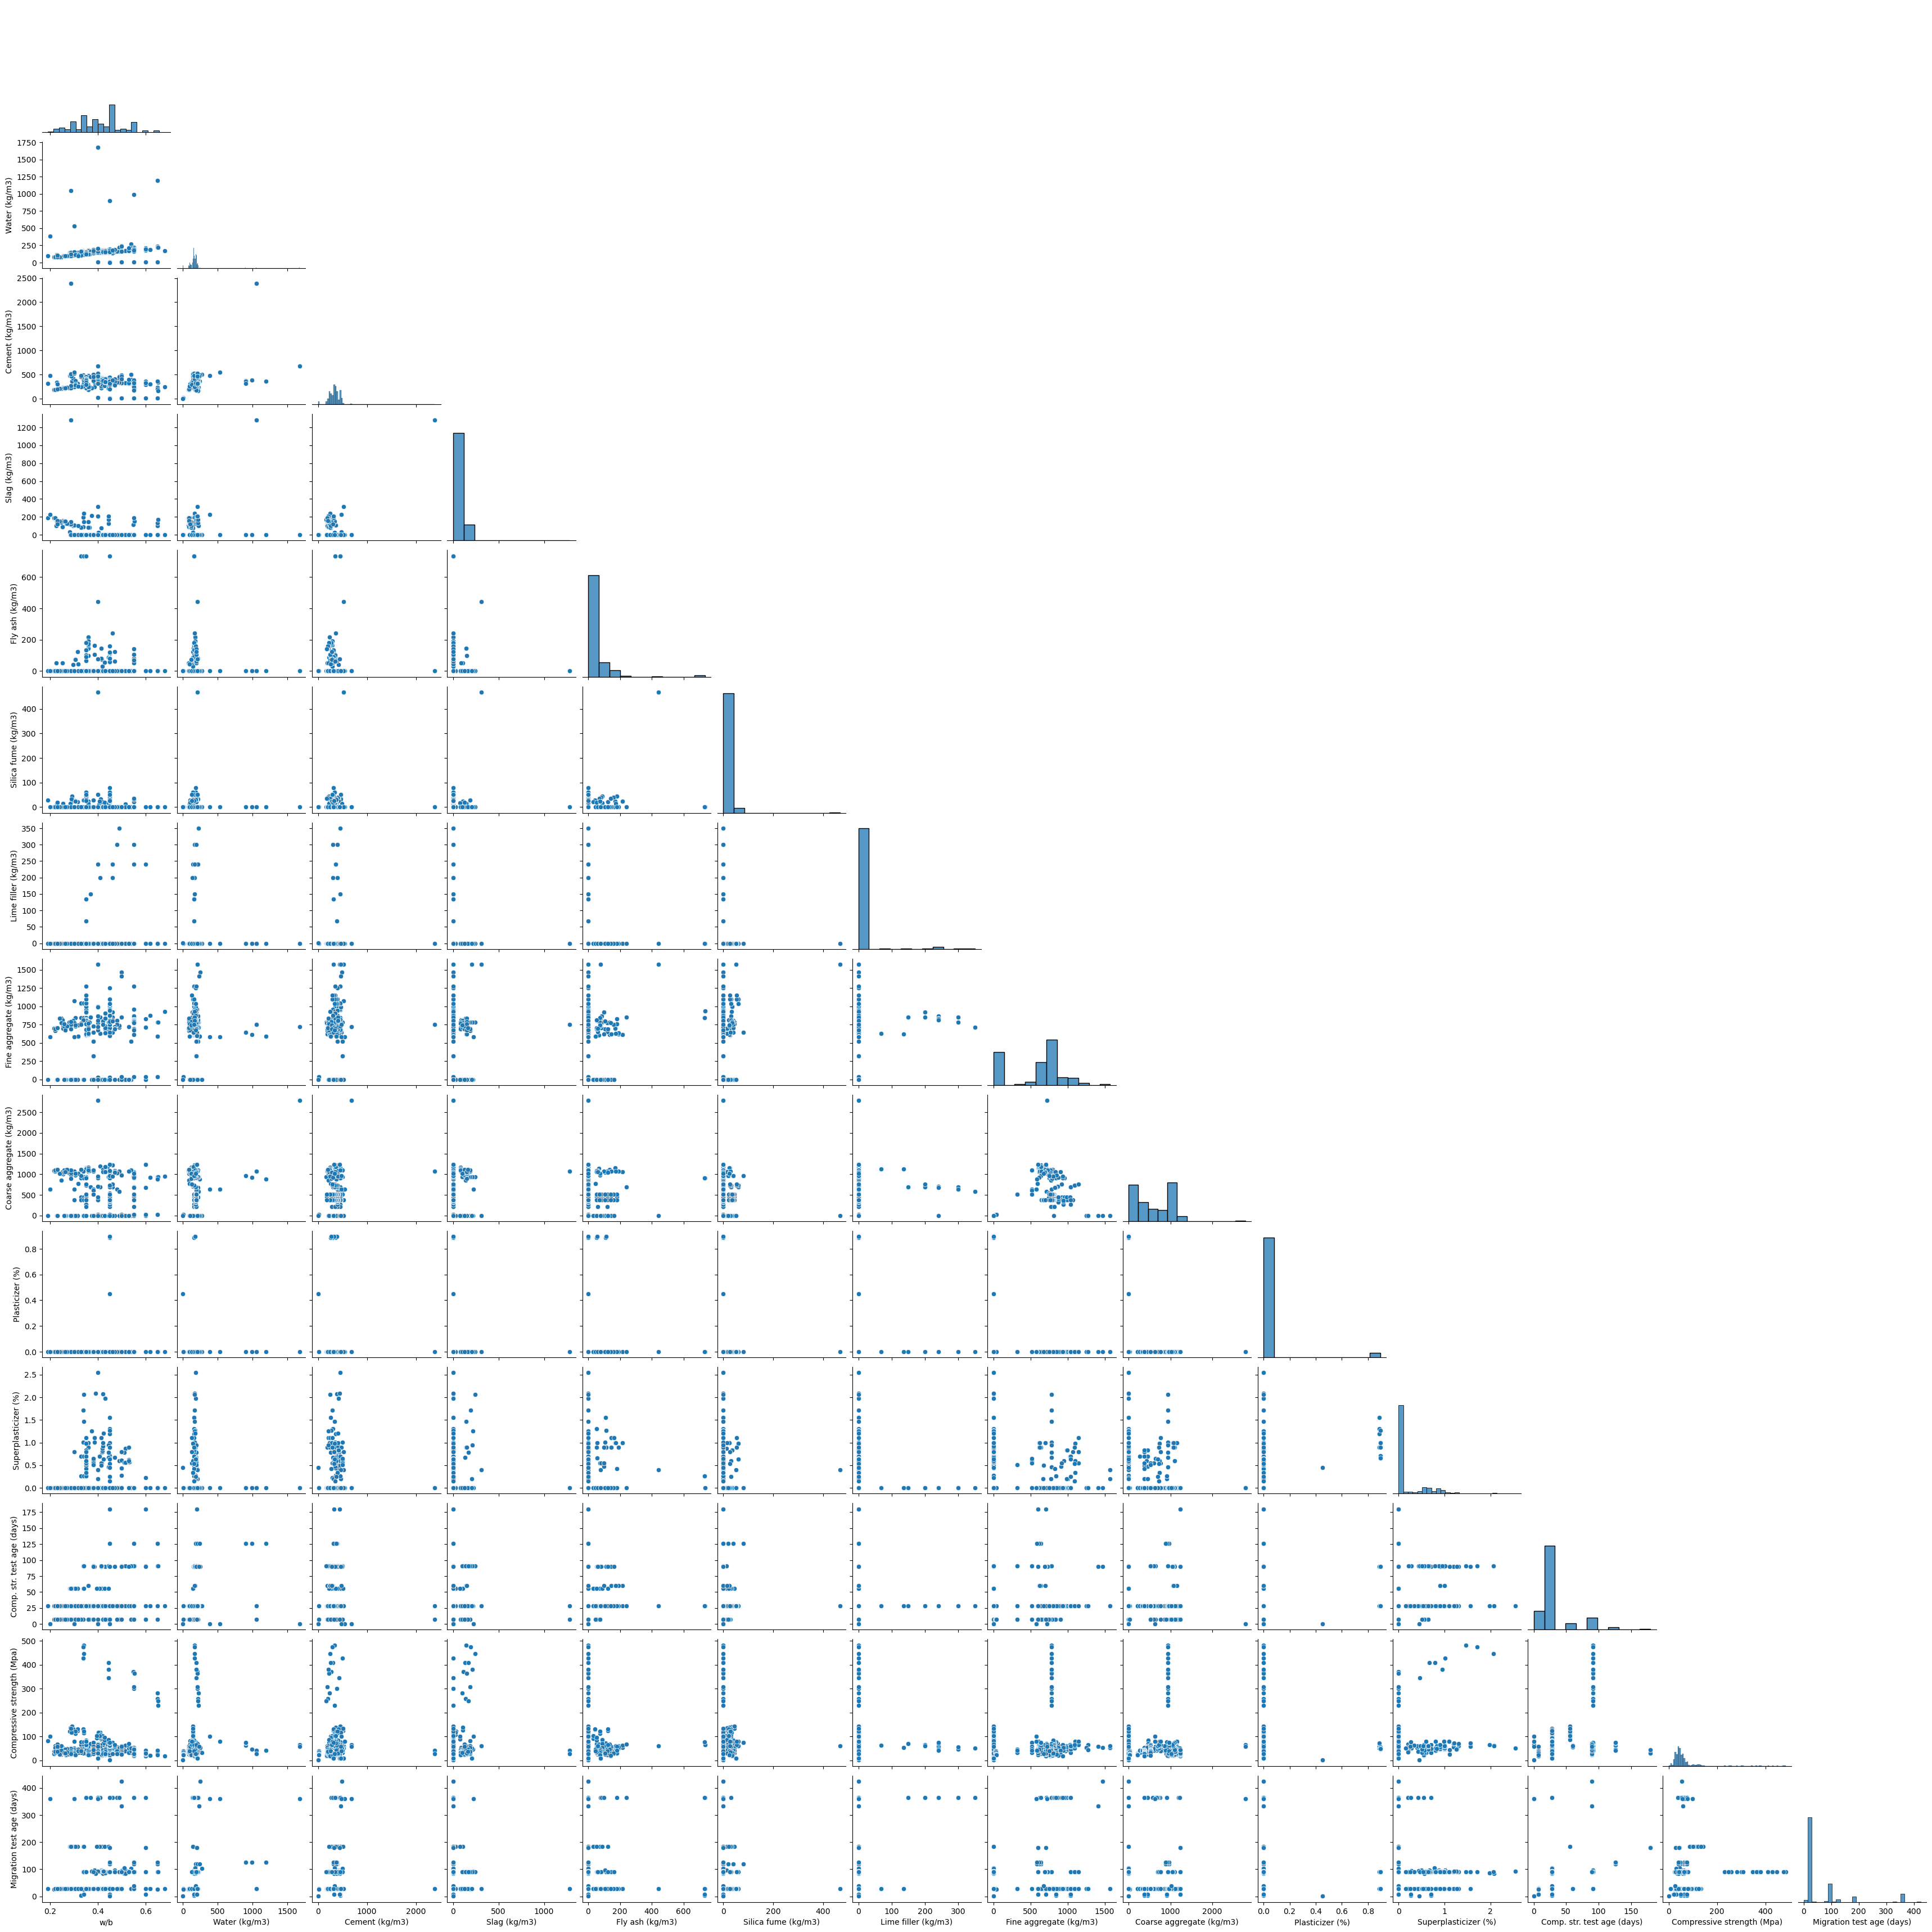

In [16]:
sns.pairplot(data=raw_data, corner=True)
plt.show()

In [17]:
raw_data.corr()

,w/b,Water (kg/m3),Cement (kg/m3),Slag (kg/m3),Fly ash (kg/m3),Silica fume (kg/m3),Lime filler (kg/m3),Fine aggregate (kg/m3),Coarse aggregate (kg/m3),Plasticizer (%),Superplasticizer (%),Comp. str. test age (days),Compressive strength (Mpa),Migration test age (days),Dnssm
w/b,1.000000,0.150839,-0.066757,-0.354067,-0.034583,-0.036653,0.116956,0.002422,-0.117395,0.092522,-0.010161,0.280034,0.005716,0.152716,0.470309
Water (kg/m3),0.150839,1.000000,0.504734,0.191053,-0.026534,-0.021105,-0.002695,0.074614,0.298348,-0.018303,-0.037799,0.157417,0.028289,0.261821,-0.086111
Cement (kg/m3),-0.066757,0.504734,1.000000,0.457089,-0.052681,0.026430,0.024151,0.081529,0.046518,-0.061619,0.019111,0.038225,0.008504,0.118413,-0.097339
Slag (kg/m3),-0.354067,0.191053,0.457089,1.000000,-0.068636,0.027533,-0.056935,0.060232,0.181005,-0.065599,-0.069492,-0.085793,0.110677,-0.103330,-0.112059
Fly ash (kg/m3),-0.034583,-0.026534,-0.052681,-0.068636,1.000000,0.170951,-0.060300,0.066787,0.012459,0.074300,0.101274,-0.001620,-0.026855,0.024470,-0.055537
Silica fume (kg/m3),-0.036653,-0.021105,0.026430,0.027533,0.170951,1.000000,-0.055148,0.110505,-0.131152,-0.063473,-0.007206,-0.012210,0.032402,-0.055967,-0.142054
Lime filler (kg/m3),0.116956,-0.002695,0.024151,-0.056935,-0.060300,-0.055148,1.000000,0.108681,0.027525,-0.033657,-0.093981,-0.044189,-0.002054,0.526082,-0.065955
Fine aggregate (kg/m3),0.002422,0.074614,0.081529,0.060232,0.066787,0.110505,0.108681,1.000000,0.576518,-0.301430,-0.208234,-0.125498,-0.012235,0.019367,0.136939
Coarse aggregate (kg/m3),-0.117395,0.298348,0.046518,0.181005,0.012459,-0.131152,0.027525,0.576518,1.000000,-0.247737,-0.237524,-0.047685,0.011383,0.009500,0.129387
Plasticizer (%),0.092522,-0.018303,-0.061619,-0.065599,0.074300,-0.063473,-0.033657,-0.301430,-0.247737,1.000000,0.385979,0.161309,-0.018786,-0.027581,-0.063541


<Axes: >

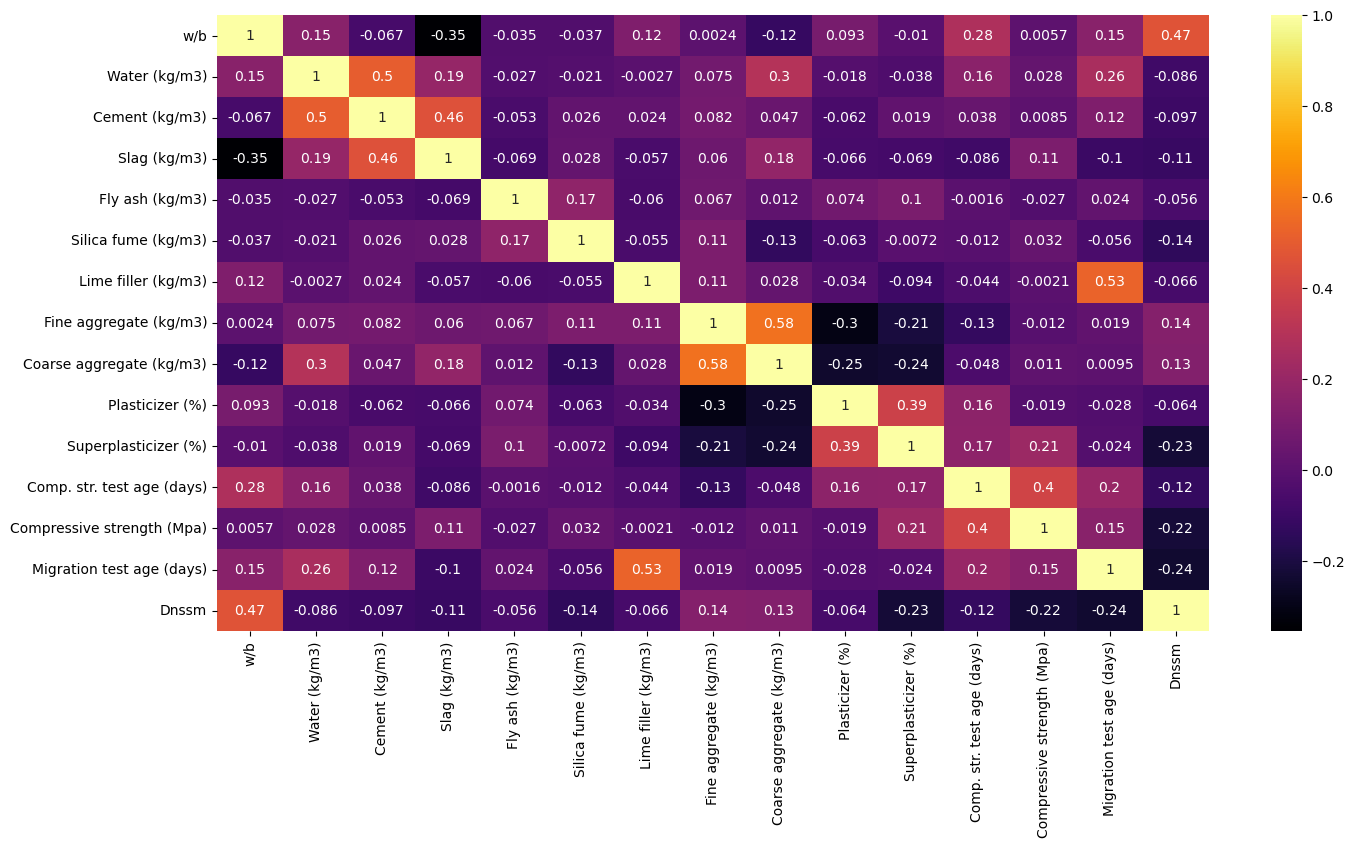

In [18]:
plt.figure(figsize=(16, 8))
sns.heatmap(raw_data.corr(), annot=True, cmap='inferno')

Key Observations
- Compressive Strength (MPa) and Comp. Str. Test Age (days):The compressive strength increases with curing time.
- Superplasticizer (%) and Compressive Strength (MPa): The positive correlation indicates that superplasticizer improves compressive strength.
- Water (kg/m3) and Compressive Strength (MPa): A higher water-cement ratio generally leads to lower strength.
- Water-Cement Ratio (w/b): The water-cement ratio has a strong negative correlation with chloride resistance. This is because higher water content can lead to increased porosity, making the concrete more prone to chloride penetration.
- Cement Content: Increasing cement content generally improves chloride resistance.
- Slag: It can improve chloride resistance, excessive amounts might lead to increased porosity.
- Fly Ash: Similar to slag, fly ash can enhance chloride resistance.
- Silica Fume: Silica fume is highly effective in improving chloride resistance due to its very fine particle size.
- Plasticizer: While plasticizers can improve workability, they might also increase porosity, potentially reducing chloride resistance.
- Superplasticizer: Superplasticizers generally have a positive effect on chloride resistance due to their ability to reduce water content without compromising workability.
- Compressive Strength: This suggests that denser, stronger concrete is prone to chloride penetration.

### Add new features

In [19]:
raw_data['Total_Binder_Content'] = (raw_data['Cement (kg/m3)'] + raw_data['Slag (kg/m3)'] +
                              raw_data['Fly ash (kg/m3)'] + raw_data['Silica fume (kg/m3)'] +
                              raw_data['Lime filler (kg/m3)'])


raw_data['Aggregate_to_Binder_Ratio'] = (raw_data['Fine aggregate (kg/m3)'] +
                                    raw_data['Coarse aggregate (kg/m3)']) / raw_data['Total_Binder_Content']

raw_data['Plasticizer_to_Cement_Ratio'] = raw_data['Plasticizer (%)'] / raw_data['Cement (kg/m3)']

raw_data['Superplasticizer_to_Cement_Ratio'] = raw_data['Superplasticizer (%)'] / raw_data['Cement (kg/m3)']

raw_data['Compressive_Strength_per_Day'] = raw_data['Compressive strength (Mpa)'] / raw_data['Comp. str. test age (days)']
raw_data.head()

,w/b,Water (kg/m3),Cement (kg/m3),Slag (kg/m3),Fly ash (kg/m3),Silica fume (kg/m3),Lime filler (kg/m3),Fine aggregate (kg/m3),Coarse aggregate (kg/m3),Plasticizer (%),Superplasticizer (%),Comp. str. test age (days),Compressive strength (Mpa),Migration test age (days),Dnssm,Total_Binder_Content,Aggregate_to_Binder_Ratio,Plasticizer_to_Cement_Ratio,Superplasticizer_to_Cement_Ratio,Compressive_Strength_per_Day
0,0.45,180.00,400.0,0.0,0.0,0.0,0.0,640.0,960.0,0.0,0.0,126.0,63.22,120.0,2.85,400.0,4.0,0.0,0.0,0.501746
1,0.45,180.00,380.0,0.0,0.0,20.0,0.0,640.0,960.0,0.0,0.0,126.0,63.46,120.0,1.75,400.0,4.0,0.0,0.0,0.503651
2,0.45,180.00,360.0,0.0,0.0,40.0,0.0,640.0,960.0,0.0,0.0,126.0,70.88,120.0,0.9,400.0,4.0,0.0,0.0,0.562540
3,0.45,180.00,320.0,0.0,0.0,80.0,0.0,640.0,960.0,0.0,0.0,126.0,74.51,120.0,0.2,400.0,4.0,0.0,0.0,0.591349
4,0.55,210.65,383.0,0.0,0.0,0.0,0.0,612.8,919.2,0.0,0.0,126.0,46.57,120.0,4.76,383.0,4.0,0.0,0.0,0.369603


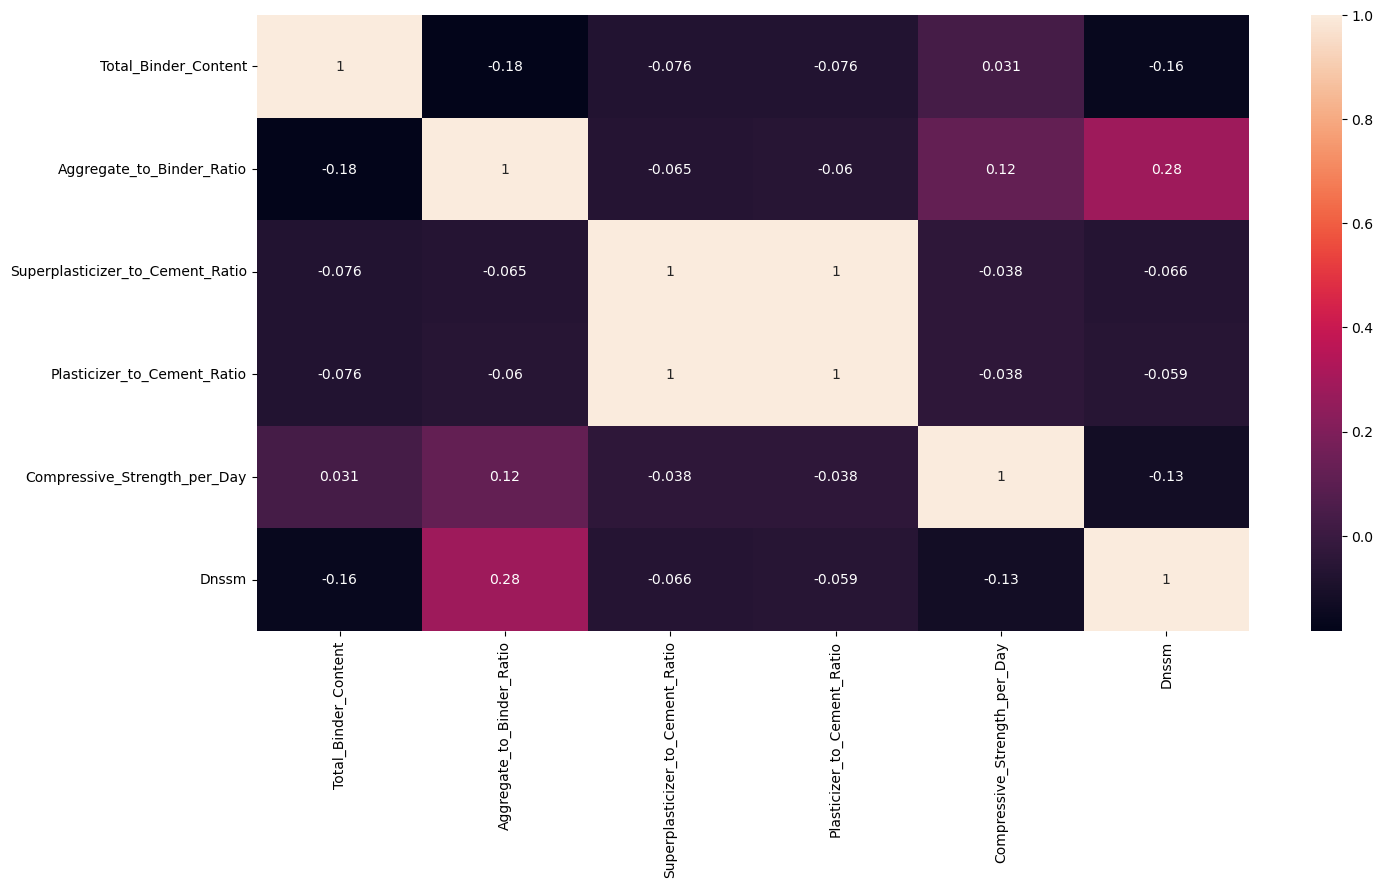

In [20]:
selected_columns = ['Total_Binder_Content','Aggregate_to_Binder_Ratio','Superplasticizer_to_Cement_Ratio','Plasticizer_to_Cement_Ratio','Compressive_Strength_per_Day', 'Dnssm']
correlation_matrix = raw_data[selected_columns].corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Key Observations
- Total Binder Content: This suggests that increasing the amount of binder (cement and supplementary materials) can enhance the chloride resistance.
- Aggregate-to-Binder Ratio: A negative correlation is observed, indicating that increasing the amount of aggregate relative to binder might decrease chloride resistance.
- Superplasticizer-to-Cement Ratio: A weak positive correlation suggests that using superplasticizers in moderate amounts can slightly improve chloride resistance.
- Plasticizer-to-Cement Ratio: There's a weak positive correlation, similar to superplasticizers.
- Compressive Strength per Day: A positive correlation exists, suggesting that concrete with higher compressive strength tends to have better chloride resistance.
- Dnssm: The correlation with Dnssm is negative, as expected. Higher Dnssm values indicate greater chloride penetration, which is inversely related to chloride resistance.

In [21]:
raw_data = raw_data.drop(['Compressive_Strength_per_Day','Superplasticizer_to_Cement_Ratio','Plasticizer_to_Cement_Ratio','Aggregate_to_Binder_Ratio', 'Total_Binder_Content'], axis=1)

In [22]:
# Let's check the correlation between all input features and the target variable

raw_data.corr()['Dnssm']

w/b                           0.470309
Water (kg/m3)                -0.086111
Cement (kg/m3)               -0.097339
Slag (kg/m3)                 -0.112059
Fly ash (kg/m3)              -0.055537
Silica fume (kg/m3)          -0.142054
Lime filler (kg/m3)          -0.065955
Fine aggregate (kg/m3)        0.136939
Coarse aggregate (kg/m3)      0.129387
Plasticizer (%)              -0.063541
Superplasticizer (%)         -0.225038
Comp. str. test age (days)   -0.122942
Compressive strength (Mpa)   -0.220415
Migration test age (days)    -0.240147
Dnssm                         1.000000
Name: Dnssm, dtype: float64

In [23]:
raw_data.columns

Index(['w/b', 'Water (kg/m3)', 'Cement (kg/m3)', 'Slag (kg/m3)',
       'Fly ash (kg/m3)', 'Silica fume (kg/m3)', 'Lime filler (kg/m3)',
       'Fine aggregate (kg/m3)', 'Coarse aggregate (kg/m3)', 'Plasticizer (%)',
       'Superplasticizer (%)', 'Comp. str. test age (days)',
       'Compressive strength (Mpa)', 'Migration test age (days)', 'Dnssm'],
      dtype='object')

### Data Preparation for Training

In [24]:
# import the necessary libraries

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score,GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import randint


In [25]:
# defining input and target variables

x,y = raw_data.drop(['Dnssm'], axis = 1), raw_data['Dnssm']


### Data splitting into Training, Validation and Test Data

In [26]:
# Splitting data into train (80%) and test (20%)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Further splitting the train data into train (70%) and validation (30%)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [27]:
# Min/Max Scaling of numeric features

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### Model Training

In [28]:
# Models 

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
}

results = {'Model': [], 'Mean RMSE': [], 'Mean R2': [], 'Mean MAE':[]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define your k-fold

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
    cv_mean_rmse = np.sqrt(-scores.mean())
    
    r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="r2")
    cv_r2_mean = np.mean(r2_scores)
    
    mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_absolute_error")
    cv_mae_mean = np.mean(mae_scores)
    
    results['Model'].append(model_name)
    results['Mean RMSE'].append(cv_mean_rmse)
    results['Mean R2'].append(cv_r2_mean)
    results['Mean MAE'].append(cv_mae_mean)

results_df = pd.DataFrame(results).sort_values('Mean R2', ascending=False)
print(results_df)

               Model  Mean RMSE   Mean R2  Mean MAE
2      Random Forest   3.831447  0.645573 -2.432532
3            XGBoost   4.170112  0.601738 -2.480206
1      Decision Tree   4.799201  0.456517 -2.985881
0  Linear Regression   5.258112  0.297661 -3.386685


In [29]:
results_df

,Model,Mean RMSE,Mean R2,Mean MAE
2,Random Forest,3.831447,0.645573,-2.432532
3,XGBoost,4.170112,0.601738,-2.480206
1,Decision Tree,4.799201,0.456517,-2.985881
0,Linear Regression,5.258112,0.297661,-3.386685


Random Forest is the best model, followed by XGBoost. The Decision Tree and Linear Regression models are less effective for this dataset. Therefore we'll be tuning Random Forest parameters to further enhance its performance

### Hyperparameter Tuning for Random Forest

####  Define the Model and Hyperparameter Search Space

In [30]:
# Initialize the RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Define the hyperparameter search space

param_dist = {
    'n_estimators': randint(50, 200),        # Number of trees in the forest
    'max_depth': randint(10, 50),            # Maximum depth of the tree
    'min_samples_split': randint(2, 10),     # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10),      # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2', None]   # Valid options for max_features
}


#### Perform Hyperparameter Tuning Using RandomizedSearchCV

In [31]:
# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist, 
    n_iter=100,    # Number of parameter settings that are sampled
    cv=5,          # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Metric to optimize
    n_jobs=-1,     # Use all available cores
    random_state=42,
    verbose=1      # Show progress
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000184390360D0>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018439013910>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018434B92150>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000184359766D0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

#### Review the Best Parameters and Model Performance

In [32]:
# Best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Calculate metrics
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)


print('Our Optimized RandomForestRegressor got the following scores on the test set:')
print('R-squared: {}'.format(r_squared))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))

Best Parameters: {'max_depth': 13, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 177}
Our Optimized RandomForestRegressor got the following scores on the test set:
R-squared: 0.7311244353877856
MSE: 8.968674863511984
RMSE: 2.9947745931057956
MAE: 2.0622369790469066


In [33]:
comparison_table = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(comparison_table.head(20))

        Actual  Predicted
282        7.9   7.338257
443  24.813319  21.025703
90        0.99   3.649546
450    8.84915   5.797075
105  13.014951  11.050699
439  13.333785  11.531900
445   6.632436   7.952724
116   9.620299  12.410096
802       2.33   4.256728
791       4.41   7.050723
166   1.682573   2.986311
111   7.854363   7.457954
403        9.7  10.583656
246          8   8.808156
549  15.640864  15.576272
193       5.38   4.517858
259        8.6   8.828089
10          12   8.479641
113    7.99939   7.731157
407        8.3  10.813314


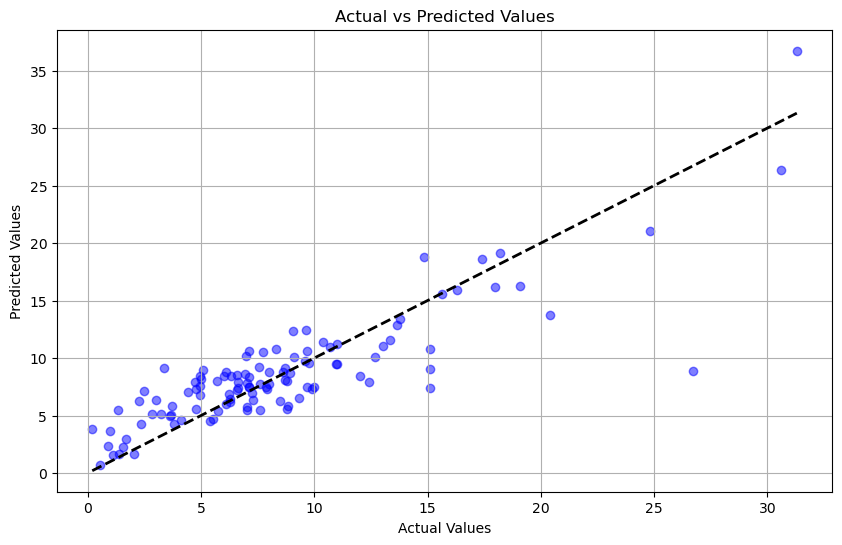

In [34]:
# Plotting actual vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

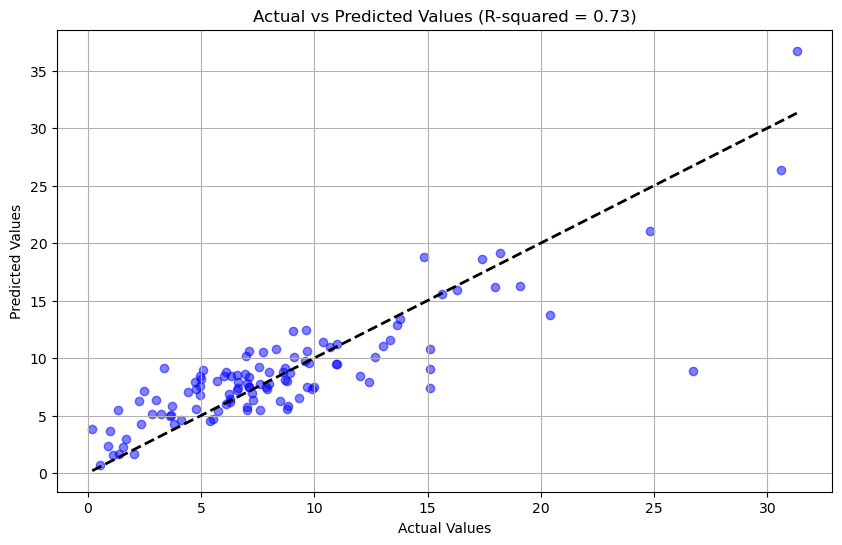

In [35]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (R-squared = {:.2f})'.format(r_squared))
plt.grid(True)
plt.show()

#### R-squared of 0.73

I think we can be quite pleased with this result. This can be interpreted as: Our model can account for 73% of the variance in the data. 

### Feature Importances
Here we get a look at how much each input variable factored in to our final model.

In [36]:
# Create a dataframe showing the feature importances

importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
0,w/b,0.368855
12,Compressive strength (Mpa),0.178763
8,Coarse aggregate (kg/m3),0.169644
13,Migration test age (days),0.069007
7,Fine aggregate (kg/m3),0.048005
2,Cement (kg/m3),0.040564
1,Water (kg/m3),0.039102
5,Silica fume (kg/m3),0.027933
10,Superplasticizer (%),0.017721
4,Fly ash (kg/m3),0.015900


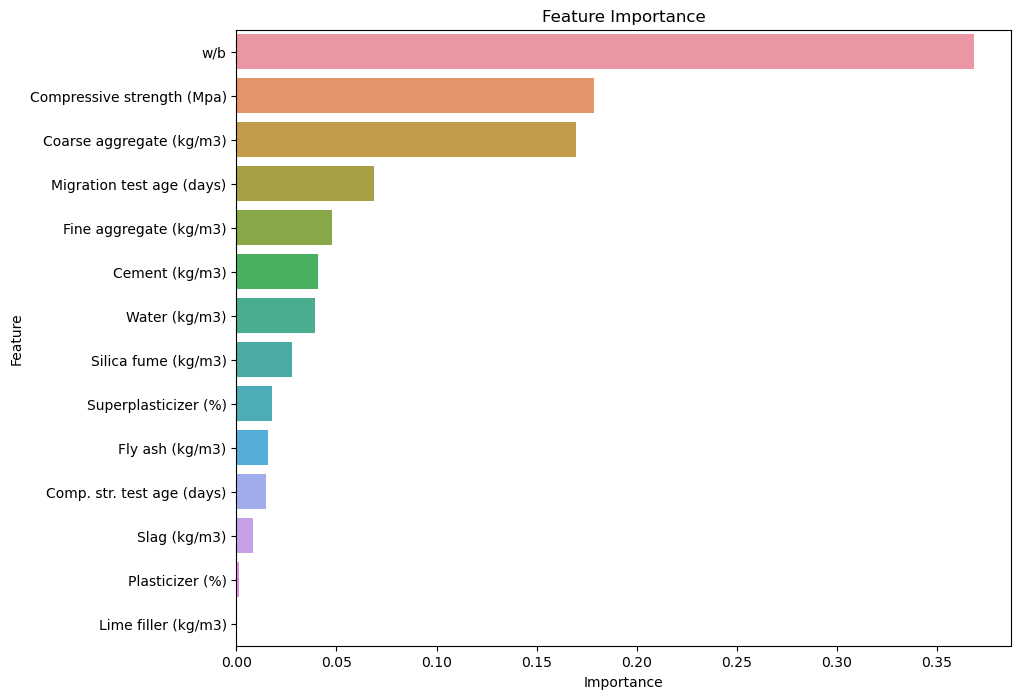

In [37]:
# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the bar plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Show the plot
plt.show()

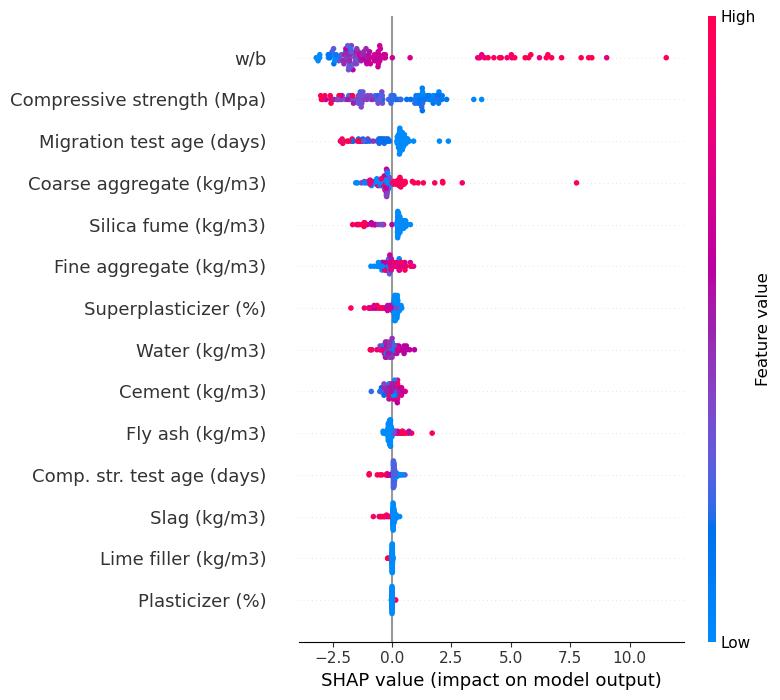

In [38]:
import shap

model.fit(X_train, y_train)

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


# Generate summary plot
shap.summary_plot(shap_values, X_test,feature_names=x.columns)

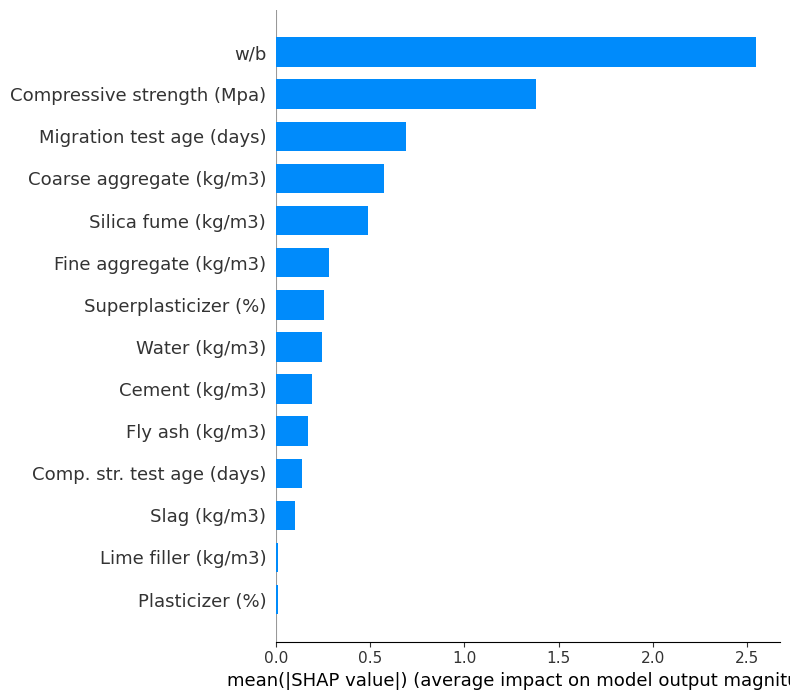

In [39]:
shap.summary_plot(shap_values,  plot_type='bar', feature_names=x.columns, show=False)
plt.show()

In [40]:
# Create a DataFrame with the SHAP values
shap_df = pd.DataFrame(shap_values, columns=x.columns)

# Display the DataFrame
shap_df.head() 

,w/b,Water (kg/m3),Cement (kg/m3),Slag (kg/m3),Fly ash (kg/m3),Silica fume (kg/m3),Lime filler (kg/m3),Fine aggregate (kg/m3),Coarse aggregate (kg/m3),Plasticizer (%),Superplasticizer (%),Comp. str. test age (days),Compressive strength (Mpa),Migration test age (days)
0,-1.202744,0.547423,-0.017630,0.042143,-0.104099,0.383796,0.013966,0.333642,-0.061246,-0.005435,0.140138,0.057041,-0.507205,-1.319210
1,6.207298,-0.141040,0.295313,0.129666,-0.097184,0.235460,0.006921,0.353827,1.794589,0.002751,0.112601,0.074784,1.727630,0.588938
2,-1.944597,-0.270539,-0.343630,0.069697,0.135727,0.263323,0.004059,-0.894325,-0.434030,-0.031121,-1.737157,-0.206493,0.368330,-0.532418
3,-2.683739,-0.016682,-0.423987,-0.046332,-0.041624,0.542660,0.006131,0.104170,0.420913,-0.015550,0.250906,0.078292,-1.272872,0.427595
4,3.605389,0.052528,0.123891,0.057837,-0.121079,0.238024,0.004966,-0.365869,-0.658383,0.003033,-0.076245,0.096682,-0.026780,-1.100099
